In [35]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import squarify

In [101]:
# specify the path of file folder
folder_path = "C:\\Users\\lenovo\\ipython\\NUS\\5346\\data"

# read all files in the folder
file_list = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# create a df to save all data from file
data_df = pd.DataFrame()

for filename in file_list:
    file_path = os.path.join(folder_path,filename)
    df = pd.read_csv(file_path,encoding = 'utf-8')
    data_df = pd.concat([data_df,df],ignore_index=True)

data_df


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
909280,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,NaN
909281,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,NaN
909282,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,NaN
909283,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,NaN


In [102]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909285 entries, 0 to 909284
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                909285 non-null  object 
 1   town                 909285 non-null  object 
 2   flat_type            909285 non-null  object 
 3   block                909285 non-null  object 
 4   street_name          909285 non-null  object 
 5   storey_range         909285 non-null  object 
 6   floor_area_sqm       909285 non-null  float64
 7   flat_model           909285 non-null  object 
 8   lease_commence_date  909285 non-null  int64  
 9   resale_price         909285 non-null  float64
 10  remaining_lease      200235 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 76.3+ MB


In [103]:
data_df['date'] = pd.to_datetime(data_df['month'])
data_df['year'] = data_df['date'].dt.year
data_df['month'] = data_df['date'].dt.month
data_df = data_df.sort_values(by=['year','month']).reset_index(drop=True)


In [104]:
# create a new column: price_per_sqm
data_df['price_per_sqm'] = round(data_df['resale_price']/data_df['floor_area_sqm'],2)
# only one column has missing value
data_df.fillna(0,inplace=True)
data_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,date,year,price_per_sqm
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,0,1990-01-01,1990,290.32
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,0,1990-01-01,1990,193.55
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,0,1990-01-01,1990,258.06
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,0,1990-01-01,1990,193.55
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,0,1990-01-01,1990,646.58


### Boxplot chart of HDB resale price by year

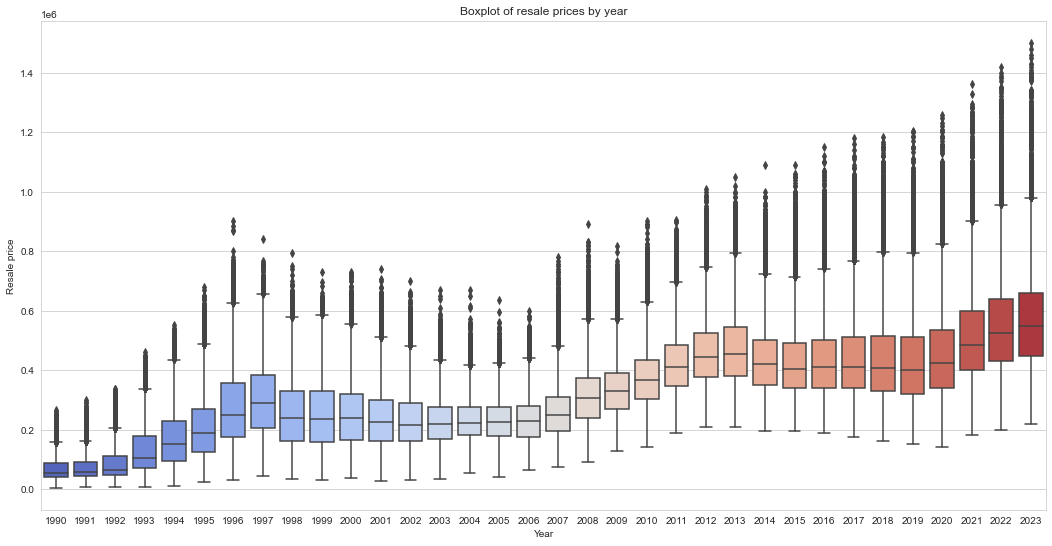

In [31]:
plt.figure(figsize=(18,9))
sns.set_style("whitegrid")
sns.boxplot(x='year', y='resale_price', data=data_df, palette="coolwarm")
plt.title('Boxplot of resale prices by year')
plt.xlabel('Year')
plt.ylabel('Resale price')
#plt.grid(True)
plt.show()

From the chart, we can see that there is an increasing trend of HDB resale price from 1990 to 2023.But during1997-1998 and 2013-2014, the HDB resale price decreased slightly and remained at the same level for the following years. Both of the resale price decrease happened after a sharp increase of resale price, we can infer that maybe government had taken some actions to prevent the too fast growth of housing prices. 

### Boxplot chart of HDB floor_area_sqm by year

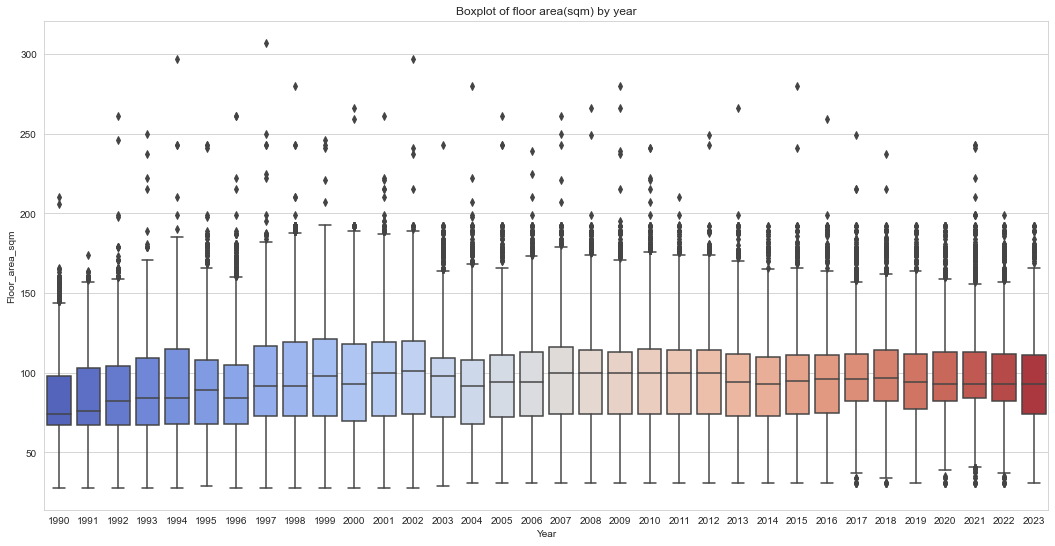

In [126]:
plt.figure(figsize=(18,9))
sns.set_style("whitegrid")
sns.boxplot(x='year', y='floor_area_sqm', data=data_df, palette="coolwarm")
plt.title('Boxplot of floor area(sqm) by year')
plt.xlabel('Year')
plt.ylabel('Floor_area_sqm')
#plt.grid(True)
plt.show()

The size of the houses nearly remain the same over these 30 years, which can be seen from the flat trend of the boxplot. The average size of HDB remains around 70 sqm in 1990s and slightly increased to about 100 sqms since 2007, indicating the citizens living areas have become larger.

### Treemap of the geological distribution of the HDB

In [79]:
# prepare the data for plotting the chart
town_group = data_df.groupby('town')['resale_price'].agg(['count']).reset_index()
town_group_sorted = town_group.sort_values(by='count',ascending = False).reset_index(drop=True)
# calculate the percentage of HDB transaction of each town
total_resale = town_group_sorted['count'].sum()
town_group_percentage = 100*town_group_sorted['count']/total_resale
town_group_percentage

0     8.659661
1     7.573423
2     7.235795
3     7.196314
4     7.064232
5     5.651253
6     5.460554
7     4.762863
8     4.125549
9     3.704999
10    3.606130
11    3.425879
12    3.416641
13    3.116845
14    3.056797
15    3.043270
16    2.987072
17    2.931534
18    2.685627
19    2.478761
20    2.312366
21    2.126946
22    1.450040
23    0.874533
24    0.773245
25    0.272632
26    0.007038
Name: count, dtype: float64

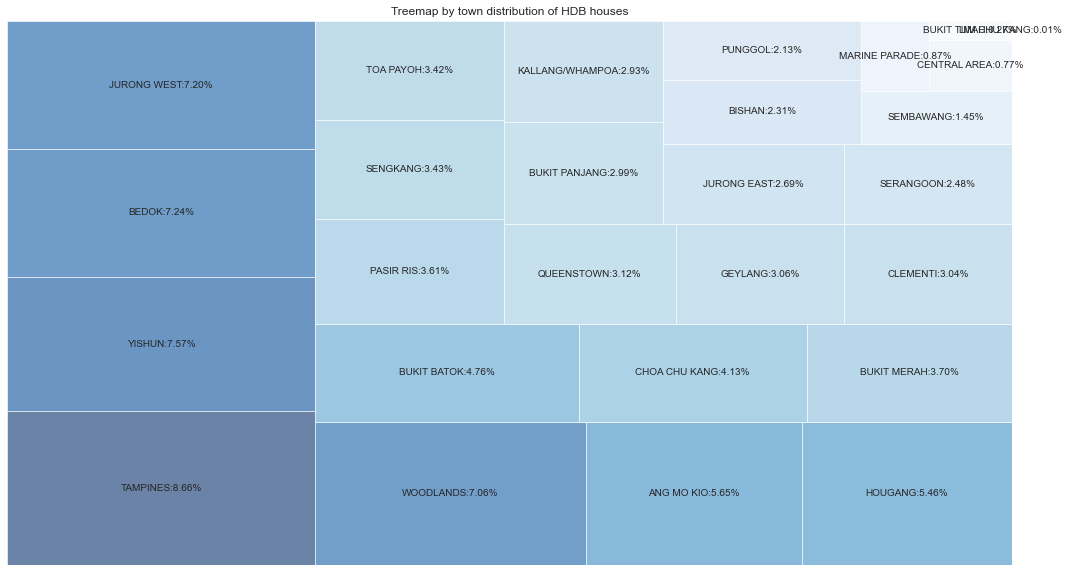

In [87]:
# draw the chart
cmap = plt.cm.Blues
mini = min(town_group_sorted['count'])
maxi = max(town_group_sorted['count'])
norm = plt.Normalize(vmin= mini,vmax = maxi)
colors = [cmap(norm(value)) for value in town_group_sorted['count']]

# zip the town name and its respective percentage of HDB resale amount
labels = [f'{town}:{percentage:.2f}%' for town,percentage in zip(town_group_sorted['town'],town_group_percentage)]

plt.figure(figsize=(18,10))
squarify.plot(sizes=town_group_sorted['count'],
             label = labels,
             color = colors,
             alpha=0.6)
plt.title('Treemap by town distribution of HDB houses')
plt.axis('off')
plt.show()

After sorting the dataset by counting the transaction volume of every town, i use treemap to visualize the geographical distribution of HDB resale. 
Tampines, Yishun, Bedok, Jurong west, and woodlands have the most HDB resale in these 30 years, which account nearly 37% of the total transaction amount. 


### Heatmap of the month distribution of HDB resale amount by year

In [90]:
heatmap_group = data_df.groupby(['year','month']).size().unstack(fill_value=0).reset_index()
heatmap_group.head(5)

month,year,1,2,3,4,5,6,7,8,9,10,11,12
0,1990,1507,931,1150,1047,778,824,1405,1078,865,810,1090,1020
1,1991,1253,816,854,920,945,836,1247,1163,1206,1183,1382,1050
2,1992,1202,954,1113,1067,1140,1059,1294,1254,1396,1353,1376,1295
3,1993,1142,1138,1113,1055,1149,1223,1431,1488,1740,1823,2526,2288
4,1994,2674,2535,2791,2425,1905,2158,2153,2049,1838,1778,1827,2240


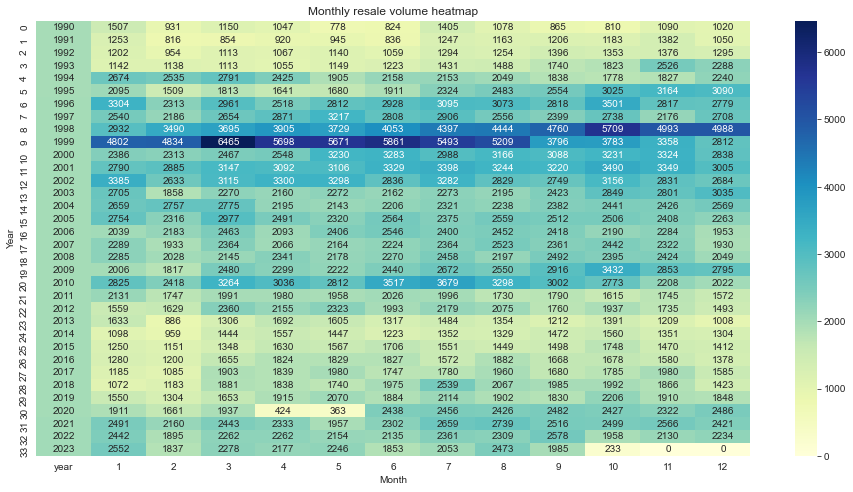

In [91]:
plt.figure(figsize=(16,8))
sns.heatmap(heatmap_group,cmap='YlGnBu',annot=True,fmt='d')
plt.title('Monthly resale volume heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

Each cell of this heatmap represents a specific month and year, with the color intensity reflecting the volume of resales – darker blues indicating higher volumes, while lighter colors suggest lower numbers.

There is a noticeable trend of higher resale volumes during the middle of the year, particular from march to August, which indicates a seasonal pattern of property transactions.
The second half of 1990s show consistently high transaction of HDB, signifying a hot housing market. Starting from the year 2000, there appears to be a gradual decrease in the volume of resales, which could be the result of some housing market cooling policies.


### The relation of HDB resale price and GDP per capita

In [117]:
gdp_per_Capita = pd.read_csv(r"API_NY.GDP.PCAP.CD_DS2_en_csv_v2_73.csv")
gdp_per_Capita_sg = gdp_per_Capita[gdp_per_Capita['Country Name']=='Singapore']
gdp_per_Capita_sg

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
208,Singapore,SGP,GDP per capita (current US$),NY.GDP.PCAP.CD,428.056183,449.148137,472.08274,511.202235,485.530686,516.531929,...,56967.42579,57564.80231,55645.60686,56895.65831,61164.89736,66836.522,66070.48681,61273.99166,77710.08924,82807.62906


In [119]:
gdp_per_Capita_long = pd.melt(gdp_per_Capita_sg, 
                              id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                              var_name='year', 
                              value_name='GDP per capita')
# only maintain gdp data from 1990-2022
gdp_per_Capita_long['year']=gdp_per_Capita_long['year'].astype(int)
gdp_per_Capita = gdp_per_Capita_long[gdp_per_Capita_long['year']>=1990]
gdp_per_Capita.reset_index(drop=True)
#gdp_per_Capita = gdp_per_Capita[gdp_per_Capita['Year','GDP per capita']]
gdp_per_Capita_lastTwo = gdp_per_Capita.iloc[:,-2:].reset_index(drop=True)
gdp_per_Capita_lastTwo.head()

,year,GDP per capita
0,1990,11861.75616
1,1991,14502.37999
2,1992,16136.24054
3,1993,18290.13011
4,1994,21552.41004


In [120]:
# Change the 'year' column to a string data type if necessary
gdp_per_Capita_lastTwo['year'] = gdp_per_Capita_lastTwo['year'].astype(str)
print(gdp_per_Capita_lastTwo)
mean_resale_Price = data_df[(data_df['year']>=1990)&(data_df['year']<=2022)].groupby('year')['resale_price'].mean().round(2)#.reset_index(drop=True)
mean_resale_Price= mean_resale_Price.reset_index()

mean_resale_Price['year'] = mean_resale_Price['year'].astype(str)
mean_resale_Price

    year  GDP per capita
0   1990     11861.75616
1   1991     14502.37999
2   1992     16136.24054
3   1993     18290.13011
4   1994     21552.41004
5   1995     24914.85070
6   1996     26232.86610
7   1997     26375.86537
8   1998     21829.27378
9   1999     21796.63739
10  2000     23852.83895
11  2001     21699.74149
12  2002     22159.83737
13  2003     23730.38401
14  2004     27608.08001
15  2005     29961.31728
16  2006     33768.45282
17  2007     39432.88602
18  2008     40008.57205
19  2009     38926.80544
20  2010     47236.68308
21  2011     53891.45703
22  2012     55547.55531
23  2013     56967.42579
24  2014     57564.80231
25  2015     55645.60686
26  2016     56895.65831
27  2017     61164.89736
28  2018     66836.52200
29  2019     66070.48681
30  2020     61273.99166
31  2021     77710.08924
32  2022     82807.62906


,year,resale_price
0,1990,68086.14
1,1991,73588.94
2,1992,84372.64
3,1993,132807.72
4,1994,172619.53
5,1995,212122.10
6,1996,279282.34
7,1997,308213.92
8,1998,257637.91
9,1999,252302.74


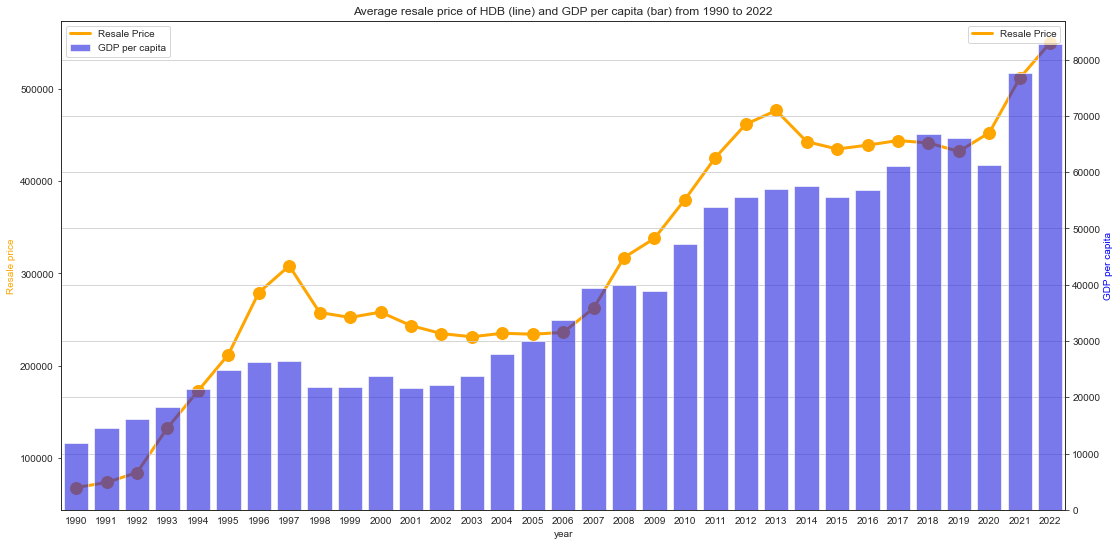

In [124]:
# combined the average HDB resale price each year with the GDP value of that year
combined_df = pd.merge(gdp_per_Capita_lastTwo,mean_resale_Price,on='year',how='inner')

# draw the chart
plt.figure(figsize = (18,9))
sns.set_style('white')

# Create the left y-axis for resale price(line plot)
ax1 = sns.lineplot(data=combined_df,x='year',y='resale_price',color='orange',linewidth='3',label='Resale Price')
sns.scatterplot(data = combined_df,x='year',y='resale_price',color='orange',s=200)

# Create the right y-axis for GDP Per capita(batplot)
ax2 = ax1.twinx()
sns.barplot(data = combined_df,x='year',y='GDP per capita',color='blue',label='GDP per capita',alpha=0.6)

# set labels,title, and legends
plt.title('Average resale price of HDB (line) and GDP per capita (bar) from 1990 to 2022')
plt.xlabel('year')
ax1.set_ylabel('Resale price',color = 'orange')
ax2.set_ylabel('GDP per capita',color = 'blue')

# add legends
lines,labels1 = ax1.get_legend_handles_labels()
bars,labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines+bars,labels1+labels2,loc = 'upper left')

plt.grid(True)
plt.show()

The orange line chart represents the average HDB resale price of that year, while the blue bar chart representing the GDP per capita of Singapore. The overall trend of resale price and GDP per capita is in accordance to some extent. So there is some kind of relationship between housing price and GDP value. 